# Explorando Hill Climbing: Dos Ejercicios Prácticos 🏔️

## ¿Qué es Hill Climbing?

**Hill Climbing** (Escalada de Colina) es un algoritmo de optimización que funciona como un escalador que busca la cima de una montaña en la niebla:

- 🥾 **Empieza en un punto cualquiera** (posición inicial)
- 👀 **Mira a su alrededor** (explora vecinos cercanos)
- ⬆️ **Da un paso hacia arriba** (se mueve al mejor vecino)
- 🔄 **Repite hasta llegar a la cima** (cuando no puede subir más)

Es un algoritmo **simple, eficiente y efectivo** para problemas con un solo máximo (o un solo mínimo).

---

En esta libreta exploraremos **dos casos prácticos** donde Hill Climbing brilla:

1. 🌡️ **Ejercicio 1**: Encontrar la temperatura ideal de un aire acondicionado
2. 📈 **Ejercicio 2**: Maximizar una función cuadrática con restricciones de dominio

¡Vamos a escalar! 🚀

---

# Ejercicio 1: Temperatura Ideal del Aire Acondicionado 🌡️❄️

## 1.1. La Función de Comodidad

**Problema**: En una sala con aire acondicionado, queremos encontrar la **temperatura que maximiza la comodidad** de las personas.

### La Función Objetivo

Usaremos esta función de comodidad:

```python
def comodidad(X):
    return max(0, 100 - abs(X - 23) * 10)
```

**¿Cómo funciona?**

- 🎯 **En 23°C**: La comodidad es **máxima** (100 puntos)
- 📉 **Por cada grado de diferencia**: La comodidad **disminuye 10 puntos**
- 🔻 **Forma triangular**: La función tiene forma de "carpa" o "V invertida"
- ⚠️ **Nunca negativa**: `max(0, ...)` asegura que la comodidad no baje de 0

**Ejemplos**:
- 🌡️ Temperatura 23°C → Comodidad = 100 (¡perfecto!)
- 🌡️ Temperatura 22°C → Comodidad = 90 (1 grado de diferencia)
- 🌡️ Temperatura 20°C → Comodidad = 70 (3 grados de diferencia)
- 🌡️ Temperatura 13°C → Comodidad = 0 (10+ grados de diferencia)

**Objetivo**: Empezar en 18°C y usar Hill Climbing para encontrar la temperatura ideal de 23°C.

C:\Users\marco\AppData\Local\Temp\ipykernel_19520\2372206358.py:43: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


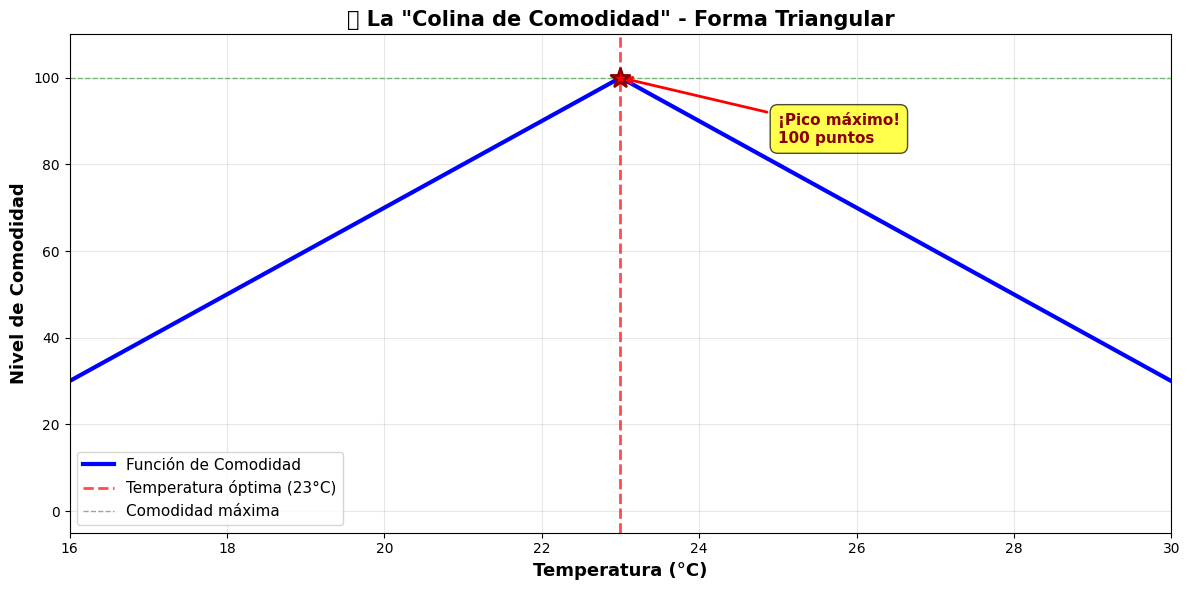


📊 ANÁLISIS DE LA FUNCIÓN DE COMODIDAD
🎯 Temperatura óptima: 23°C
⭐ Comodidad máxima: 100 puntos

Ejemplos:
  • Temperatura 18°C → Comodidad = 50
  • Temperatura 20°C → Comodidad = 70
  • Temperatura 22°C → Comodidad = 90
  • Temperatura 23°C → Comodidad = 100
  • Temperatura 24°C → Comodidad = 90
  • Temperatura 26°C → Comodidad = 70
  • Temperatura 28°C → Comodidad = 50


In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo: nivel de comodidad según la temperatura
def comodidad(X):
    """
    Calcula el nivel de comodidad para una temperatura dada.
    
    Parámetros:
        X (float): Temperatura en grados Celsius
    
    Retorna:
        float: Nivel de comodidad (0 a 100)
    """
    # La comodidad es 100 en 23°C y disminuye 10 puntos por cada grado de diferencia
    return max(0, 100 - abs(X - 23) * 10)

# Crear datos para visualización
temperaturas = np.linspace(16, 30, 300)
valores_comodidad = [comodidad(t) for t in temperaturas]

# Visualizar la "colina de comodidad"
plt.figure(figsize=(12, 6))
plt.plot(temperaturas, valores_comodidad, 'b-', linewidth=3, label='Función de Comodidad')
plt.axvline(x=23, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Temperatura óptima (23°C)')
plt.axhline(y=100, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Comodidad máxima')
plt.scatter([23], [100], color='red', s=200, zorder=5, marker='*', edgecolors='darkred', linewidths=2)
plt.xlabel('Temperatura (°C)', fontsize=13, fontweight='bold')
plt.ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
plt.title('🏔️ La "Colina de Comodidad" - Forma Triangular', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(16, 30)
plt.ylim(-5, 110)

# Anotaciones
plt.annotate('¡Pico máximo!\n100 puntos', xy=(23, 100), xytext=(25, 85),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', color='darkred',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("📊 ANÁLISIS DE LA FUNCIÓN DE COMODIDAD")
print("="*60)
print(f"🎯 Temperatura óptima: 23°C")
print(f"⭐ Comodidad máxima: {comodidad(23)} puntos")
print(f"")
print(f"Ejemplos:")
for temp in [18, 20, 22, 23, 24, 26, 28]:
    print(f"  • Temperatura {temp}°C → Comodidad = {comodidad(temp)}")
print("="*60)

In [3]:
# Implementación de Hill Climbing Genérico
def hill_climbing(start_x, step, func, domain=None, max_iter=1000):
    """
    Algoritmo Hill Climbing genérico para maximización.
    
    Parámetros:
        start_x (float): Punto de inicio
        step (float): Tamaño del paso para explorar vecinos
        func (function): Función objetivo a maximizar
        domain (list): [min, max] límites del dominio (opcional)
        max_iter (int): Número máximo de iteraciones
    
    Retorna:
        tuple: (mejor_x, camino_completo)
    """
    current_x = start_x
    current_value = func(current_x)
    camino = [current_x]  # Guardar el camino recorrido
    
    for iteracion in range(max_iter):
        # Generar dos vecinos: izquierda y derecha
        vecino_izq = current_x - step
        vecino_der = current_x + step
        
        # Si hay dominio, aplicar clipping
        if domain is not None:
            vecino_izq = max(domain[0], min(domain[1], vecino_izq))
            vecino_der = max(domain[0], min(domain[1], vecino_der))
        
        # Evaluar vecinos
        valor_izq = func(vecino_izq)
        valor_der = func(vecino_der)
        
        # Encontrar el mejor vecino
        mejor_vecino = vecino_izq if valor_izq > valor_der else vecino_der
        mejor_valor = max(valor_izq, valor_der)
        
        # Si el mejor vecino no mejora, hemos llegado al pico
        if mejor_valor <= current_value:
            break
        
        # Moverse al mejor vecino
        current_x = mejor_vecino
        current_value = mejor_valor
        camino.append(current_x)
    
    return current_x, camino

# ===== EJERCICIO 1: Ejecutar Hill Climbing =====
print("\n" + "="*70)
print("🚀 EJECUTANDO HILL CLIMBING - EJERCICIO 1")
print("="*70)

# Parámetros
start_temp = 18  # Empezar en 18°C (temperatura incómoda)
step_size = 0.5  # Paso de 0.5°C

print(f"\n🌡️  Temperatura inicial: {start_temp}°C")
print(f"📏 Tamaño de paso: {step_size}°C")
print(f"🎯 Objetivo: Encontrar la temperatura que maximiza la comodidad\n")
print("⏳ Ejecutando algoritmo...\n")

# Ejecutar el algoritmo
temperatura_final, camino_recorrido = hill_climbing(start_temp, step_size, comodidad)

# Mostrar resultados
print("✅ ¡Algoritmo completado!\n")
print("="*70)
print("📊 RESULTADOS")
print("="*70)
print(f"🏁 Temperatura final encontrada: {temperatura_final}°C")
print(f"⭐ Comodidad final: {comodidad(temperatura_final)} puntos")
print(f"🔢 Número de pasos: {len(camino_recorrido) - 1}")
print(f"")
print(f"🛤️  Camino recorrido:")
for i, temp in enumerate(camino_recorrido):
    print(f"   Paso {i}: {temp:.1f}°C → Comodidad = {comodidad(temp)}")
print("="*70)

# ¿Llegamos al óptimo?
if abs(temperatura_final - 23) < 0.01:
    print("\n🎉 ¡ÉXITO! Encontramos la temperatura óptima de 23°C")
else:
    print(f"\n⚠️  Nota: Nos acercamos mucho (error de {abs(temperatura_final - 23):.2f}°C)")


🚀 EJECUTANDO HILL CLIMBING - EJERCICIO 1

🌡️  Temperatura inicial: 18°C
📏 Tamaño de paso: 0.5°C
🎯 Objetivo: Encontrar la temperatura que maximiza la comodidad

⏳ Ejecutando algoritmo...

✅ ¡Algoritmo completado!

📊 RESULTADOS
🏁 Temperatura final encontrada: 23.0°C
⭐ Comodidad final: 100.0 puntos
🔢 Número de pasos: 10

🛤️  Camino recorrido:
   Paso 0: 18.0°C → Comodidad = 50
   Paso 1: 18.5°C → Comodidad = 55.0
   Paso 2: 19.0°C → Comodidad = 60.0
   Paso 3: 19.5°C → Comodidad = 65.0
   Paso 4: 20.0°C → Comodidad = 70.0
   Paso 5: 20.5°C → Comodidad = 75.0
   Paso 6: 21.0°C → Comodidad = 80.0
   Paso 7: 21.5°C → Comodidad = 85.0
   Paso 8: 22.0°C → Comodidad = 90.0
   Paso 9: 22.5°C → Comodidad = 95.0
   Paso 10: 23.0°C → Comodidad = 100.0

🎉 ¡ÉXITO! Encontramos la temperatura óptima de 23°C


C:\Users\marco\AppData\Local\Temp\ipykernel_19520\1709235497.py:51: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


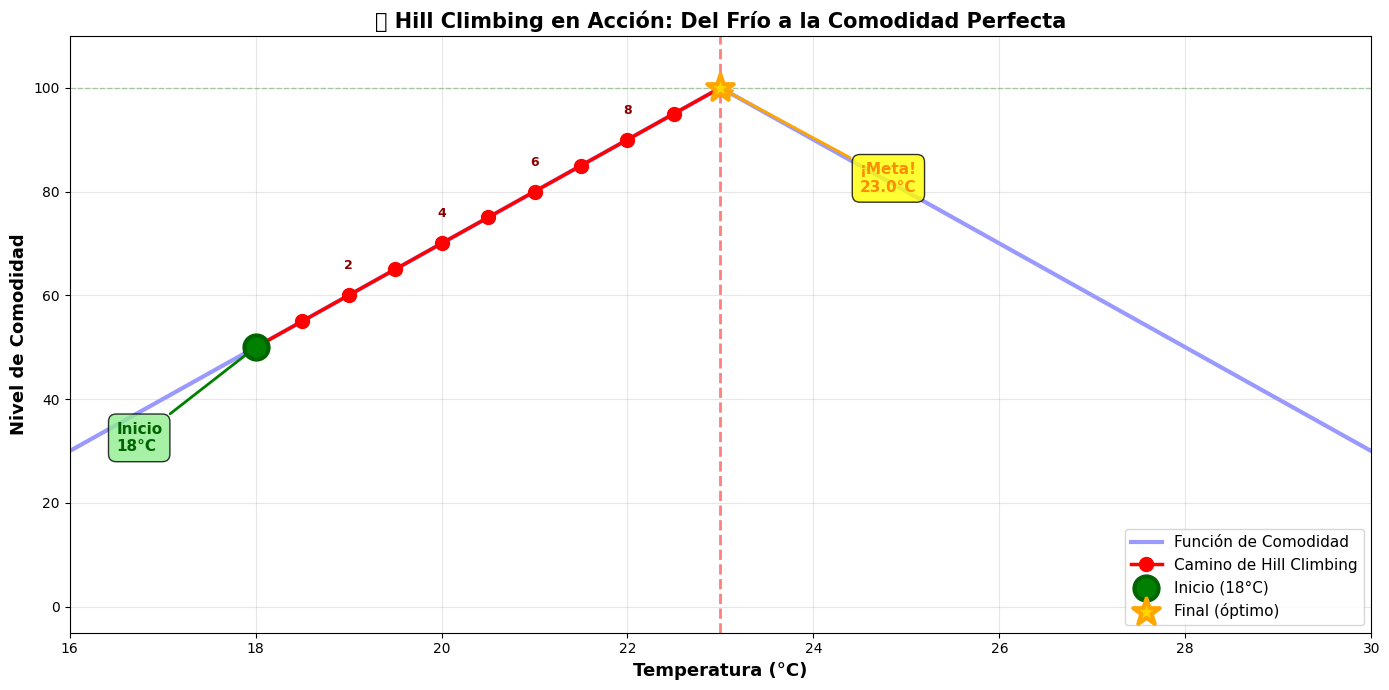


💡 INTERPRETACIÓN:
   El algoritmo empezó en 18°C (zona de baja comodidad) y fue
   'escalando la colina' paso a paso, siempre moviéndose hacia
   temperaturas con mayor comodidad, hasta llegar al pico en 23°C.


In [4]:
# Visualización del camino recorrido por Hill Climbing
plt.figure(figsize=(14, 7))

# Graficar la función de comodidad
temperaturas = np.linspace(16, 30, 300)
valores_comodidad = [comodidad(t) for t in temperaturas]
plt.plot(temperaturas, valores_comodidad, 'b-', linewidth=3, alpha=0.4, label='Función de Comodidad', zorder=1)

# Graficar el camino recorrido
camino_valores = [comodidad(t) for t in camino_recorrido]
plt.plot(camino_recorrido, camino_valores, 'ro-', linewidth=2.5, markersize=10, 
         label='Camino de Hill Climbing', zorder=5)

# Marcar inicio y final
plt.scatter([camino_recorrido[0]], [camino_valores[0]], color='green', s=300, 
           zorder=6, marker='o', edgecolors='darkgreen', linewidths=3, label='Inicio (18°C)')
plt.scatter([camino_recorrido[-1]], [camino_valores[-1]], color='gold', s=400, 
           zorder=6, marker='*', edgecolors='orange', linewidths=3, label='Final (óptimo)')

# Líneas de referencia
plt.axvline(x=23, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(y=100, color='green', linestyle='--', linewidth=1, alpha=0.3)

plt.xlabel('Temperatura (°C)', fontsize=13, fontweight='bold')
plt.ylabel('Nivel de Comodidad', fontsize=13, fontweight='bold')
plt.title('🏔️ Hill Climbing en Acción: Del Frío a la Comodidad Perfecta', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='lower right')
plt.xlim(16, 30)
plt.ylim(-5, 110)

# Anotaciones
plt.annotate(f'Inicio\n{camino_recorrido[0]}°C', xy=(camino_recorrido[0], camino_valores[0]), 
             xytext=(camino_recorrido[0]-1.5, camino_valores[0]-20),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, fontweight='bold', color='darkgreen',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

plt.annotate(f'¡Meta!\n{camino_recorrido[-1]}°C', xy=(camino_recorrido[-1], camino_valores[-1]), 
             xytext=(camino_recorrido[-1]+1.5, camino_valores[-1]-20),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2),
             fontsize=11, fontweight='bold', color='darkorange',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

# Numerar algunos pasos del camino
for i in range(0, len(camino_recorrido), max(1, len(camino_recorrido)//5)):
    if i > 0 and i < len(camino_recorrido) - 1:
        plt.text(camino_recorrido[i], camino_valores[i] + 5, f'{i}', 
                fontsize=9, ha='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   El algoritmo empezó en 18°C (zona de baja comodidad) y fue")
print("   'escalando la colina' paso a paso, siempre moviéndose hacia")
print("   temperaturas con mayor comodidad, hasta llegar al pico en 23°C.")

---

# Ejercicio 2: Maximizando una Función con Dominio Restringido 📈🔒

## 2.1. La Función Cuadrática y el Clipping

**Problema**: Encontrar el valor de `x` que maximiza la función cuadrática:

$$f(x) = -(x-3)^2 + 9$$

**Pero hay una restricción**: ❗ `x` debe permanecer **siempre dentro del intervalo [0, 6]**

---

### Características de la Función

- 📊 **Forma**: Parábola invertida (forma de "U" al revés)
- 🎯 **Máximo matemático**: En x = 3 con f(3) = 9
- 📉 **Comportamiento**: Crece hasta x=3, luego decrece

### La Técnica de Clipping

**¿Qué es el clipping?** Es una técnica para mantener un valor dentro de límites:

```python
x_clipped = max(limite_inferior, min(limite_superior, x))
```

**¿Por qué es necesario?**

Durante la búsqueda, Hill Climbing podría intentar explorar valores como x = -1 o x = 8, que están **fuera del dominio permitido [0, 6]**. El clipping ajusta esos valores:

- Si x < 0 → ajustar a x = 0
- Si x > 6 → ajustar a x = 6
- Si 0 ≤ x ≤ 6 → mantener x sin cambios

Esto asegura que **nunca salgamos de los límites permitidos**.

C:\Users\marco\AppData\Local\Temp\ipykernel_19520\2144261545.py:57: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


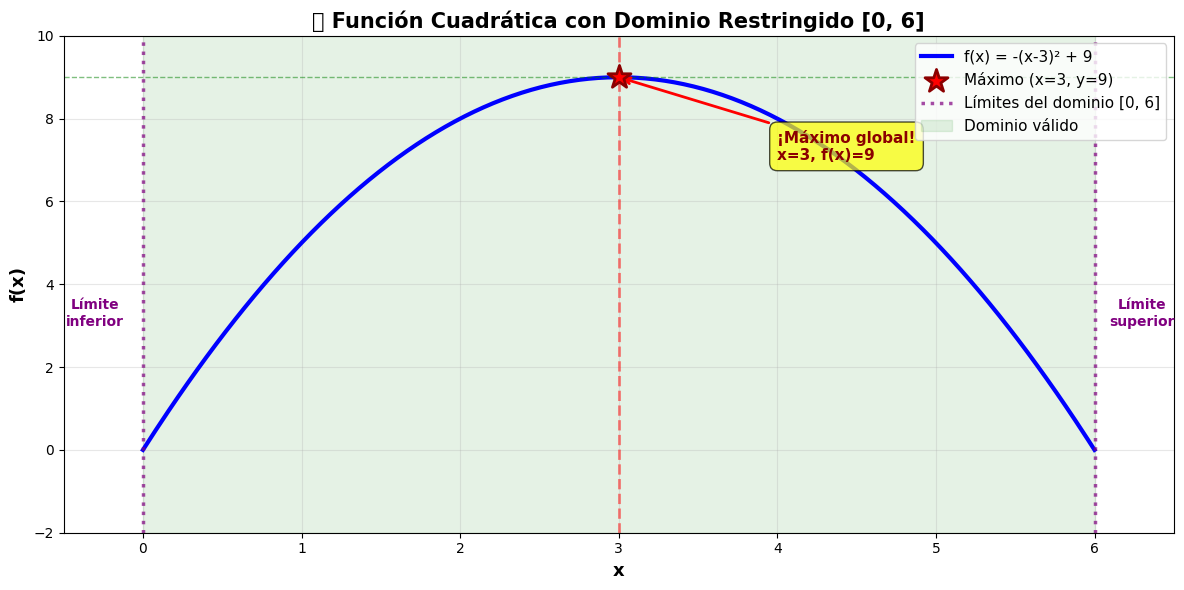


📊 ANÁLISIS DE LA FUNCIÓN
🎯 Máximo: x = 3, f(3) = 9
🔒 Dominio restringido: [0, 6]
📐 Tipo: Parábola invertida (cuadrática)

Valores de ejemplo:
  • f(0) = 0.00
  • f(1) = 5.00
  • f(2) = 8.00
  • f(3) = 9.00
  • f(4) = 8.00
  • f(5) = 5.00
  • f(6) = 0.00


In [5]:
# Función objetivo: parábola invertida
def f(x):
    """
    Función cuadrática con máximo en x=3.
    
    Parámetros:
        x (float): Valor de entrada
    
    Retorna:
        float: Valor de la función
    """
    return -(x - 3)**2 + 9

# Crear datos para visualización (solo en el dominio válido [0, 6])
x_valores = np.linspace(0, 6, 300)
y_valores = f(x_valores)

# Visualizar la parábola
plt.figure(figsize=(12, 6))
plt.plot(x_valores, y_valores, 'b-', linewidth=3, label='f(x) = -(x-3)² + 9')

# Marcar el máximo
plt.scatter([3], [9], color='red', s=300, zorder=5, marker='*', 
           edgecolors='darkred', linewidths=2, label='Máximo (x=3, y=9)')

# Líneas de referencia
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(y=9, color='green', linestyle='--', linewidth=1, alpha=0.5)

# Límites del dominio
plt.axvline(x=0, color='purple', linestyle=':', linewidth=2.5, alpha=0.7, label='Límites del dominio [0, 6]')
plt.axvline(x=6, color='purple', linestyle=':', linewidth=2.5, alpha=0.7)

# Sombrear el dominio válido
plt.fill_between([0, 6], -2, 10, alpha=0.1, color='green', label='Dominio válido')

plt.xlabel('x', fontsize=13, fontweight='bold')
plt.ylabel('f(x)', fontsize=13, fontweight='bold')
plt.title('📈 Función Cuadrática con Dominio Restringido [0, 6]', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper right')
plt.xlim(-0.5, 6.5)
plt.ylim(-2, 10)

# Anotaciones
plt.annotate('¡Máximo global!\nx=3, f(x)=9', xy=(3, 9), xytext=(4, 7),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', color='darkred',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.annotate('Límite\ninferior', xy=(0, 0), xytext=(-0.3, 3),
             fontsize=10, fontweight='bold', color='purple', ha='center')

plt.annotate('Límite\nsuperior', xy=(6, 0), xytext=(6.3, 3),
             fontsize=10, fontweight='bold', color='purple', ha='center')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("📊 ANÁLISIS DE LA FUNCIÓN")
print("="*60)
print(f"🎯 Máximo: x = 3, f(3) = {f(3)}")
print(f"🔒 Dominio restringido: [0, 6]")
print(f"📐 Tipo: Parábola invertida (cuadrática)")
print(f"")
print(f"Valores de ejemplo:")
for x in [0, 1, 2, 3, 4, 5, 6]:
    print(f"  • f({x}) = {f(x):.2f}")
print("="*60)

In [6]:
import random

# Implementación con Clipping
def hill_climbing_constrained(start_x, step, func, domain, max_iter=1000):
    """
    Hill Climbing con restricciones de dominio (clipping).
    
    Parámetros:
        start_x (float): Punto de inicio
        step (float): Tamaño del paso
        func (function): Función objetivo a maximizar
        domain (list): [min, max] límites del dominio
        max_iter (int): Número máximo de iteraciones
    
    Retorna:
        tuple: (mejor_x, camino_completo)
    """
    current_x = start_x
    current_value = func(current_x)
    camino = [current_x]
    
    for iteracion in range(max_iter):
        # Generar vecinos
        vecino_izq = current_x - step
        vecino_der = current_x + step
        
        # CLIPPING: Ajustar vecinos al dominio [min, max]
        vecino_izq = max(domain[0], min(domain[1], vecino_izq))
        vecino_der = max(domain[0], min(domain[1], vecino_der))
        
        # Evaluar vecinos
        valor_izq = func(vecino_izq)
        valor_der = func(vecino_der)
        
        # Elegir el mejor vecino
        mejor_vecino = vecino_izq if valor_izq > valor_der else vecino_der
        mejor_valor = max(valor_izq, valor_der)
        
        # Si no hay mejora, terminar
        if mejor_valor <= current_value:
            break
        
        # Moverse al mejor vecino
        current_x = mejor_vecino
        current_value = mejor_valor
        camino.append(current_x)
    
    return current_x, camino

# ===== EJERCICIO 2: Ejecutar Hill Climbing con Restricciones =====
print("\n" + "="*70)
print("🚀 EJECUTANDO HILL CLIMBING - EJERCICIO 2")
print("="*70)

# Parámetros
domain = [0, 6]  # Dominio restringido
step_size = 0.1  # Paso pequeño para mayor precisión

# Generar punto de inicio ALEATORIO dentro del dominio
random.seed(42)  # Para reproducibilidad
start_x = random.uniform(domain[0], domain[1])

print(f"\n🎲 Punto de inicio aleatorio: x = {start_x:.2f}")
print(f"📏 Tamaño de paso: {step_size}")
print(f"🔒 Dominio permitido: [{domain[0]}, {domain[1]}]")
print(f"🎯 Objetivo: Encontrar el máximo de f(x) = -(x-3)² + 9\n")
print("⏳ Ejecutando algoritmo con clipping...\n")

# Ejecutar el algoritmo
x_final, camino_recorrido = hill_climbing_constrained(start_x, step_size, f, domain)

# Mostrar resultados
print("✅ ¡Algoritmo completado!\n")
print("="*70)
print("📊 RESULTADOS")
print("="*70)
print(f"🎲 Punto de inicio: x = {start_x:.2f}")
print(f"🏁 Punto final encontrado: x = {x_final:.4f}")
print(f"⭐ Valor de la función: f({x_final:.4f}) = {f(x_final):.4f}")
print(f"🔢 Número de pasos: {len(camino_recorrido) - 1}")
print(f"")
print(f"🛤️  Primeros y últimos pasos del camino:")
# Mostrar primeros 5 pasos
for i in range(min(5, len(camino_recorrido))):
    print(f"   Paso {i}: x = {camino_recorrido[i]:.2f} → f(x) = {f(camino_recorrido[i]):.2f}")
if len(camino_recorrido) > 10:
    print("   ...")
    # Mostrar últimos 3 pasos
    for i in range(len(camino_recorrido) - 3, len(camino_recorrido)):
        print(f"   Paso {i}: x = {camino_recorrido[i]:.2f} → f(x) = {f(camino_recorrido[i]):.2f}")
print("="*70)

# Verificar si llegamos al óptimo
error = abs(x_final - 3)
if error < 0.01:
    print("\n🎉 ¡ÉXITO! Encontramos el máximo en x ≈ 3")
else:
    print(f"\n✅ Encontramos una muy buena aproximación (error: {error:.4f})")

print(f"\n🔍 ¿Se aplicó clipping durante la búsqueda?")
print(f"   El algoritmo siempre mantuvo x dentro de [{domain[0]}, {domain[1]}]")
print(f"   Valor mínimo alcanzado: {min(camino_recorrido):.2f}")
print(f"   Valor máximo alcanzado: {max(camino_recorrido):.2f}")


🚀 EJECUTANDO HILL CLIMBING - EJERCICIO 2

🎲 Punto de inicio aleatorio: x = 3.84
📏 Tamaño de paso: 0.1
🔒 Dominio permitido: [0, 6]
🎯 Objetivo: Encontrar el máximo de f(x) = -(x-3)² + 9

⏳ Ejecutando algoritmo con clipping...

✅ ¡Algoritmo completado!

📊 RESULTADOS
🎲 Punto de inicio: x = 3.84
🏁 Punto final encontrado: x = 3.0366
⭐ Valor de la función: f(3.0366) = 8.9987
🔢 Número de pasos: 8

🛤️  Primeros y últimos pasos del camino:
   Paso 0: x = 3.84 → f(x) = 8.30
   Paso 1: x = 3.74 → f(x) = 8.46
   Paso 2: x = 3.64 → f(x) = 8.59
   Paso 3: x = 3.54 → f(x) = 8.71
   Paso 4: x = 3.44 → f(x) = 8.81

✅ Encontramos una muy buena aproximación (error: 0.0366)

🔍 ¿Se aplicó clipping durante la búsqueda?
   El algoritmo siempre mantuvo x dentro de [0, 6]
   Valor mínimo alcanzado: 3.04
   Valor máximo alcanzado: 3.84


C:\Users\marco\AppData\Local\Temp\ipykernel_19520\2139330143.py:62: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Gustav\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


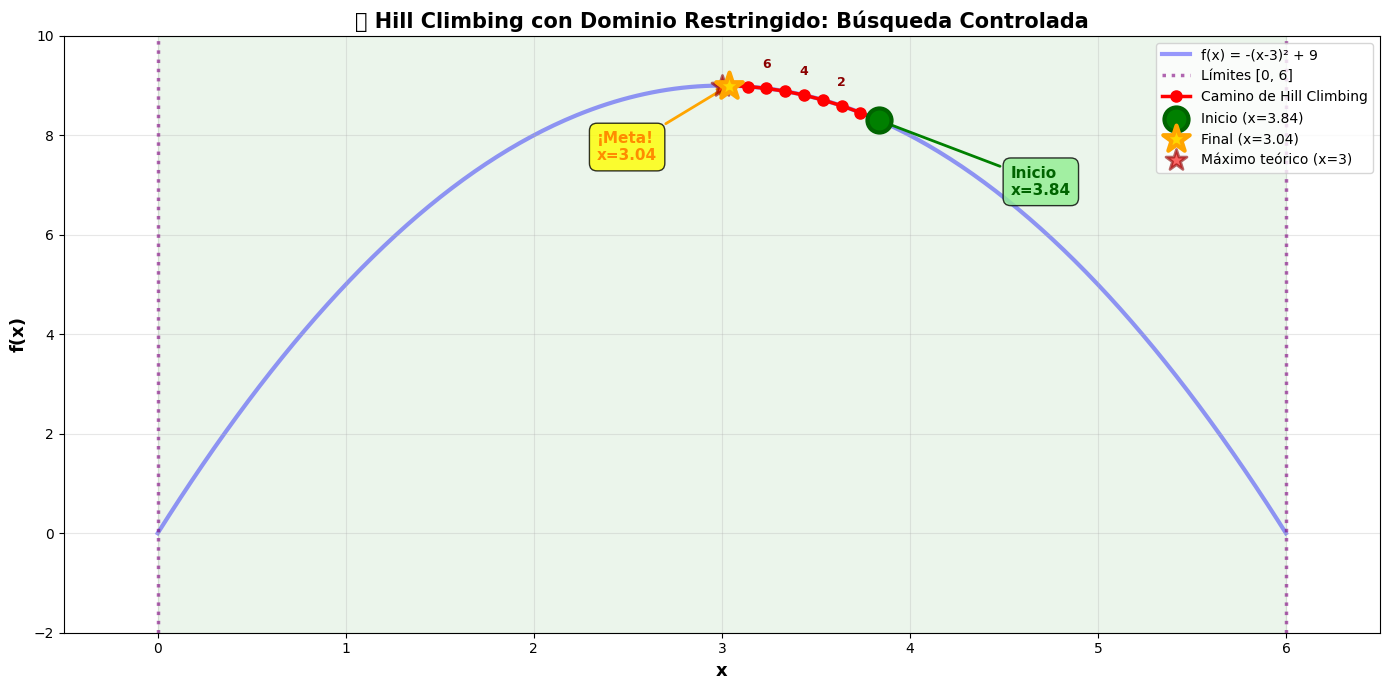


💡 INTERPRETACIÓN:
   El algoritmo comenzó en x=3.84 (punto aleatorio)
   y escaló la parábola hasta encontrar el máximo en x≈3.
   Durante todo el proceso, el clipping aseguró que x nunca
   saliera del dominio permitido [0, 6].


In [7]:
# Visualización del camino con restricciones
plt.figure(figsize=(14, 7))

# Graficar la función
x_valores = np.linspace(0, 6, 300)
y_valores = f(x_valores)
plt.plot(x_valores, y_valores, 'b-', linewidth=3, alpha=0.4, label='f(x) = -(x-3)² + 9', zorder=1)

# Sombrear dominio válido
plt.fill_between([0, 6], -2, 10, alpha=0.08, color='green', zorder=0)

# Límites del dominio
plt.axvline(x=0, color='purple', linestyle=':', linewidth=2.5, alpha=0.6, label='Límites [0, 6]')
plt.axvline(x=6, color='purple', linestyle=':', linewidth=2.5, alpha=0.6)

# Graficar el camino recorrido
camino_y = [f(x) for x in camino_recorrido]
plt.plot(camino_recorrido, camino_y, 'ro-', linewidth=2.5, markersize=8, 
         label='Camino de Hill Climbing', zorder=5)

# Marcar inicio y final
plt.scatter([camino_recorrido[0]], [camino_y[0]], color='green', s=300, 
           zorder=6, marker='o', edgecolors='darkgreen', linewidths=3, label=f'Inicio (x={camino_recorrido[0]:.2f})')
plt.scatter([camino_recorrido[-1]], [camino_y[-1]], color='gold', s=400, 
           zorder=6, marker='*', edgecolors='orange', linewidths=3, label=f'Final (x={camino_recorrido[-1]:.2f})')

# Marcar el máximo teórico
plt.scatter([3], [9], color='red', s=250, zorder=4, marker='*', 
           edgecolors='darkred', linewidths=2, alpha=0.6, label='Máximo teórico (x=3)')

plt.xlabel('x', fontsize=13, fontweight='bold')
plt.ylabel('f(x)', fontsize=13, fontweight='bold')
plt.title('🔒 Hill Climbing con Dominio Restringido: Búsqueda Controlada', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.xlim(-0.5, 6.5)
plt.ylim(-2, 10)

# Anotaciones
plt.annotate(f'Inicio\nx={camino_recorrido[0]:.2f}', 
             xy=(camino_recorrido[0], camino_y[0]), 
             xytext=(camino_recorrido[0]+0.7, camino_y[0]-1.5),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, fontweight='bold', color='darkgreen',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

plt.annotate(f'¡Meta!\nx={camino_recorrido[-1]:.2f}', 
             xy=(camino_recorrido[-1], camino_y[-1]), 
             xytext=(camino_recorrido[-1]-0.7, camino_y[-1]-1.5),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2),
             fontsize=11, fontweight='bold', color='darkorange',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

# Numerar algunos pasos
step_indices = [0, len(camino_recorrido)//4, len(camino_recorrido)//2, 
                3*len(camino_recorrido)//4, len(camino_recorrido)-1]
for i in step_indices:
    if 0 < i < len(camino_recorrido) - 1:
        plt.text(camino_recorrido[i], camino_y[i] + 0.4, f'{i}', 
                fontsize=9, ha='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print(f"   El algoritmo comenzó en x={camino_recorrido[0]:.2f} (punto aleatorio)")
print(f"   y escaló la parábola hasta encontrar el máximo en x≈3.")
print(f"   Durante todo el proceso, el clipping aseguró que x nunca")
print(f"   saliera del dominio permitido [0, 6].")

---

# 🎓 Conclusión General: Lecciones de Hill Climbing

## ✅ ¿Qué aprendimos en estos dos ejercicios?

### 1️⃣ **Ejercicio 1: Temperatura del Aire Acondicionado**

- ✨ Hill Climbing es **perfecto para problemas con un solo pico**
- 🎯 Encontró la temperatura óptima (23°C) rápidamente y sin complicaciones
- 📊 La función triangular tiene una sola cumbre → Hill Climbing brilla

**Ventajas demostradas:**
- Simple de implementar
- Rápido (pocos pasos)
- Garantiza encontrar el óptimo (cuando hay un solo máximo)

---

### 2️⃣ **Ejercicio 2: Función Cuadrática con Restricciones**

- 🔒 Hill Climbing puede **adaptarse a restricciones de dominio**
- 🛡️ La técnica de **clipping** es simple pero efectiva
- 🎲 Funciona desde cualquier punto de inicio dentro del dominio

**Técnica clave aprendida:**
```python
# Clipping: mantener valores dentro de [min, max]
x_ajustado = max(min_val, min(max_val, x))
```

Este patrón es **fundamental** en optimización con restricciones.

---

## 🚀 Fortalezas de Hill Climbing

| Fortaleza | Descripción |
|-----------|-------------|
| 🟢 **Simplicidad** | Muy fácil de entender e implementar |
| ⚡ **Rapidez** | Pocos pasos para converger |
| 💾 **Eficiencia** | No necesita mucha memoria |
| 🎯 **Efectividad** | Perfecto para funciones con un solo óptimo |
| 🔧 **Adaptabilidad** | Fácil de modificar para restricciones |

---

## ⚠️ Limitaciones (a tener en cuenta)

Aunque Hill Climbing funcionó perfectamente en estos ejemplos, **tiene debilidades**:

1. **🔴 Máximos locales**: Si la función tiene múltiples picos, puede quedar atrapado en uno que no sea el mejor
2. **👁️ Miopía**: Solo mira alrededor inmediato, no tiene visión global
3. **🎲 Dependencia del inicio**: En problemas complejos, el punto de partida afecta el resultado

---

## 📚 ¿Cuándo usar Hill Climbing?

### ✅ **SÍ usar cuando:**
- Tu función tiene **un solo máximo/mínimo**
- Necesitas una **solución rápida**
- La **simplicidad** es prioritaria
- Puedes aplicar **restricciones con clipping**

### ❌ **NO usar cuando:**
- Hay **múltiples máximos locales**
- Necesitas **garantizar el óptimo global**
- El espacio de búsqueda es muy complejo

---

## 🎯 Mensaje Final

> **Hill Climbing es como un escalador en la niebla:**  
> Puede llegar a la cima de UNA montaña muy bien,  
> pero no sabe si hay montañas más altas en otra parte.

Para estos dos ejercicios (temperatura y función cuadrática), **Hill Climbing es la herramienta perfecta**: simple, rápida y efectiva.

---

### 🔗 Próximos pasos sugeridos:

Si quieres explorar más, considera estudiar:

1. **Simulated Annealing** - Puede escapar de máximos locales
2. **Algoritmos Genéticos** - Exploran múltiples soluciones simultáneamente
3. **Random Restart Hill Climbing** - Ejecuta Hill Climbing múltiples veces
4. **Gradient Descent** - Versión continua para funciones diferenciables

---

## 🎉 ¡Felicidades!

Has completado una exploración práctica de **Hill Climbing** con dos ejercicios reales. Ahora tienes las herramientas para aplicarlo a tus propios problemas de optimización.

**¡Sigue escalando colinas! 🏔️⛰️🗻**